<a href="https://colab.research.google.com/github/sun-fox/GluonCV-Mxnet/blob/master/GluonCV_image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mxnet-cu101mkl
!pip install gluoncv

     |████████████████████████████████| 711.0MB 25kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 757kB 2.7MB/s 


In [0]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [3]:
image_url = "https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg"
image_filepath = 'dog.jpg'
gcv.utils.download(url=image_url, path=image_filepath)

100%|██████████| 160/160 [00:00<00:00, 3717.08KB/s]


'dog.jpg'

In [4]:
image = mx.image.imread('dog.jpg')
print('type',type(image))
print('type',image.shape)
print('minimum value:', image.min().asscalar())
print('maximum value:', image.max().asscalar())

type <class 'mxnet.ndarray.ndarray.NDArray'>
type (576, 768, 3)
minimum value: 0
maximum value: 255


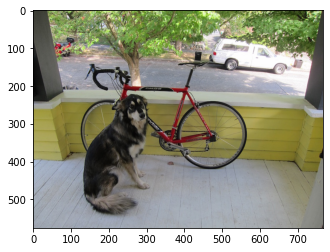

In [5]:
plt.imshow(image.asnumpy())

In [0]:
from mxnet.gluon.data.vision import transforms

transforms_fn = transforms.Compose([
    transforms.ToTensor(),#converts to CHW format
    transforms.Normalize([.485,.456,.406],[.229,.224,.225])
])

In [8]:
image = transforms_fn(image)
print('type',type(image))
print('type',image.shape)
print('minimum value:', image.min().asscalar())
print('maximum value:', image.max().asscalar())

type <class 'mxnet.ndarray.ndarray.NDArray'>
type (3, 576, 768)
minimum value: -2.117904
maximum value: 2.64


In [9]:
image = image.expand_dims(0)
print(image.shape)

(1, 3, 576, 768)


In [10]:
network = gcv.model_zoo.get_model('fcn_resnet50_ade',pretrained=True)

57418KB [00:01, 34779.31KB/s]                           


128832KB [00:02, 46233.09KB/s]                            


In [11]:
output = network.demo(image)
print(output.shape)

(1, 150, 576, 768)


/usr/local/lib/python3.6/dist-packages/gluoncv/model_zoo/segbase.py:102: UserWarning: demo method will be deprecated in favor of predict.
  warnings.warn('demo method will be deprecated in favor of predict.')


In [12]:
output = output[0]
print(output.shape)

(150, 576, 768)


Applying image segementation classification at Pixel Level individually

In [0]:
px_height,px_width = 300,500
px_logit = output[:,px_height,px_width]

In [15]:
px_probability = mx.nd.softmax(px_logit)
px_rounded_probablity = mx.nd.round(px_probability*100)/100
print(px_rounded_probablity)


[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.96 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
<NDArray 150 @cpu(0)>


In [17]:
class_index = mx.nd.argmax(px_logit,axis=0)
class_index = class_index[0].astype('int').asscalar()
print(class_index)

127


In [18]:
print(network.classes[class_index])

bicycle, bike, wheel, cycle


or

In [19]:
from gluoncv.data.ade20k.segmentation import ADE20KSegmentation

class_label = ADE20KSegmentation.CLASSES[class_index]
print(class_label)

bicycle, bike, wheel, cycle


In [0]:
output_proba = mx.nd.softmax(output,axis=0)

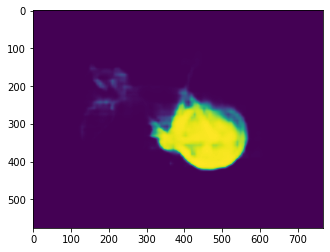

In [21]:
output_heatmap = output_proba[class_index]
plt.imshow(output_heatmap.asnumpy())

Visualizing most likely classes

In [22]:
prediction = mx.nd.argmax(output,0).asnumpy()
print(prediction.shape)

(576, 768)


In [23]:
print(prediction)

[[0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 4. 4. 4.]
 ...
 [3. 3. 3. ... 0. 0. 0.]
 [3. 3. 3. ... 0. 0. 0.]
 [3. 3. 3. ... 0. 0. 0.]]


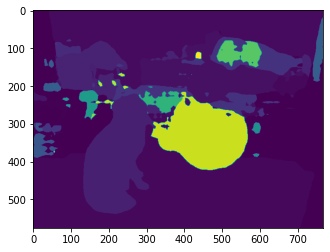

In [28]:
plt.imshow(prediction)

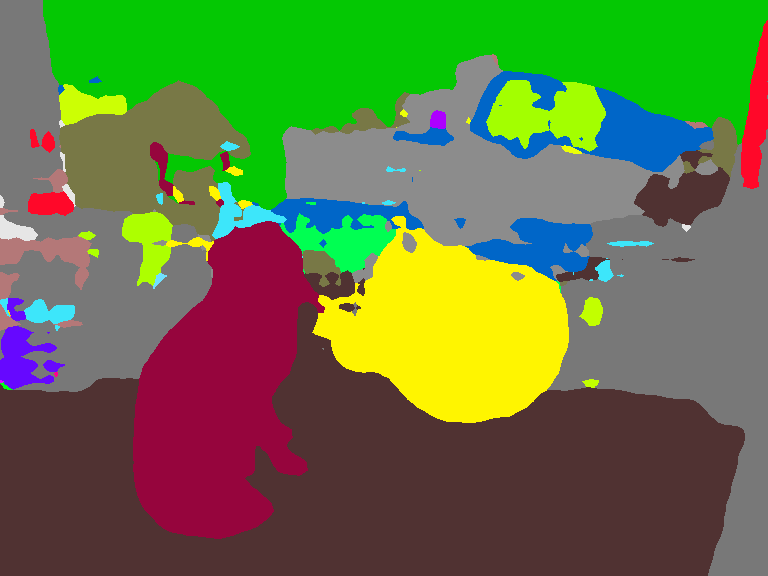

In [26]:
from gluoncv.utils.viz import get_color_pallete

prediction_image = get_color_pallete(prediction,'ade20k')
prediction_image